In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
time_df = pd.read_csv("time_sheet_framed_paper.csv")

In [3]:
time_df

,Pipeline,Error Rate,Coverage,Start Times,Total Time,Avg Base,Avg Base Mul 1024,Speedup,Worst Node,Worst Node Time,...,Rank 119 95 Percentile Fraction,Rank 120 95 Percentile Fraction,Rank 121 95 Percentile Fraction,Rank 122 95 Percentile Fraction,Rank 123 95 Percentile Fraction,Rank 124 95 Percentile Fraction,Rank 125 95 Percentile Fraction,Rank 126 95 Percentile Fraction,Rank 127 95 Percentile Fraction,Rank 128 95 Percentile Fraction
0,"RS(28,28)",0.05,25,2023-02-09 01:24:56.626000,22339.031,122.950277,125901.084,5.635924,c008n02,2836.655,...,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,"RS(0,56)",0.1,15,2023-02-08 21:59:01.317000,11737.625,71.135633,72842.888,6.205931,c008n02,1472.660,...,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,"RS(0,56)",0.01,25,2023-02-09 01:02:04.090000,9268.072,62.361981,63858.669,6.890178,c013n02,1182.627,...,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,"RS(9,47)",0.05,30,2023-02-09 03:47:18.168000,11591.205,82.301669,84276.909,7.270763,c013n02,1513.397,...,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,"RS(14,42)",0.1,10,2023-02-08 19:20:48.964000,5079.160,38.159372,39075.197,7.693240,c013n02,664.244,...,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,"RS(0,56)",0.01,30,2023-02-09 03:35:15.708000,376.368,44.743088,45816.922,121.734372,c012n03,47.828,...,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
268,"HEDGES(0.75,39)",DNArSim,30,2023-02-16 21:47:07.275000,5446.058,649.371771,664956.694,122.098717,c038n01,734.024,...,0.125,0.0,0.125,0.000,0.0,0.0,0.0,0.0,0.0,0.0
269,"RS(28,28)",0.01,30,2023-02-09 03:22:05.108000,756.736,90.267026,92433.435,122.147532,c004n03,96.953,...,0.000,0.0,0.000,0.875,0.0,0.0,0.0,0.0,0.0,0.0
270,"RS(9,47)",0.01,30,2023-02-09 03:05:01.665000,446.895,53.678303,54966.582,122.996637,c004n04,58.930,...,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0


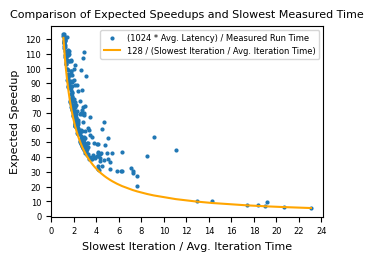

48.57635748970448


In [4]:
x = time_df["Avg Norm Slowest"]
y1 = time_df["Speedup"]
y2 = time_df["Expected Speedup With Slowest Node Slowdown"]
fig,axes = plt.subplots(1,1,figsize=(3.25,2.5),layout="constrained")
axes.scatter(x,y1,s=4.0,label="(1024 * Avg. Latency) / Measured Run Time")
x,y2 = zip(*sorted(zip(x,y2)))
axes.plot(x,y2,linestyle="-",color="orange",label="128 / (Slowest Iteration / Avg. Iteration Time)" )
#axes.hlines(np.percentile(y1,25),min(x),max(x),color='r',linestyle="--")
axes.set_yticks(range(0,130,10))
axes.set_xticks(range(0,25,2))
axes.set_xlabel("Slowest Iteration / Avg. Iteration Time",fontsize=8)
axes.set_ylabel("Expected Speedup",fontsize=8)
axes.tick_params(axis='x', labelsize=6)
axes.tick_params(axis='y', labelsize=6)
plt.legend(fontsize=6)
plt.title("Comparison of Expected Speedups and Slowest Measured Time",fontsize=8)
plt.show(fig)
fig.savefig("timesheet.pdf",format="pdf")
print(np.percentile(y1,25))




0        5.635924
1        6.205931
2        6.890178
3        7.270763
4        7.693240
          ...    
267    121.734372
268    122.098717
269    122.147532
270    122.996637
271    123.037357
Name: Speedup, Length: 272, dtype: float64


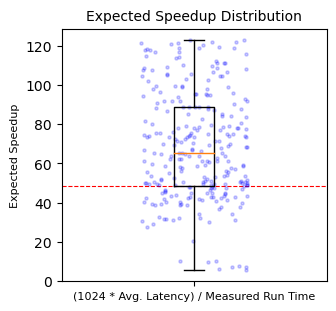

In [5]:
y1 = time_df["Speedup"]
fig,axes = plt.subplots(1,1,figsize=(3.25,3.0),layout="constrained")
print(y1)
axes.boxplot(y1,labels=["(1024 * Avg. Latency) / Measured Run Time"],zorder=100)
#axes.violinplot(y1)

plt.scatter([1+np.random.uniform(-0.2,0.2,1) for _ in range(len(y1))], y1, alpha=0.2, color='b',s=5.0,zorder=10)
axes.tick_params(axis='x', labelsize=8)
#axes.hlines(np.percentile(y1,25),min(x),max(x),color='r',linestyle="--")
axes.set_ylabel("Expected Speedup",fontsize=8)
plt.title("Expected Speedup Distribution",fontsize=10)
axes.hlines(np.percentile(y1,25),0.5,1.5,color='r',linestyle="--",linewidth=0.8)
plt.show(fig)
fig.savefig("box_plot_speedup.pdf",format="pdf")


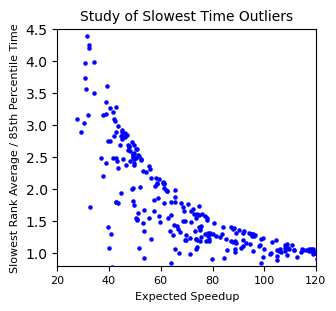

In [6]:
y = time_df["85 Percentile"]
y2 = time_df["Average Worst Rank Time"]
y1=(y2/y)
y3=time_df["Worst Node Time"]/y
fig,axes = plt.subplots(1,1,figsize=(3.25,3.0),layout="constrained")
plt.scatter(time_df["Speedup"], y1, alpha=1, color='b',s=5.0,zorder=10)
#plt.scatter(time_df["Speedup"], y3, alpha=1, color='r',s=5.0,zorder=10)

axes.tick_params(axis='x', labelsize=8)
axes.set_xlim([20,120])
axes.set_ylim([0.8,4.5])
axes.set_ylabel("Slowest Rank Average / 85th Percentile Time",fontsize=8)
axes.set_xlabel("Expected Speedup",fontsize=8)

plt.title("Study of Slowest Time Outliers",fontsize=10)
plt.show(fig)
fig.savefig("outlier.pdf",format="pdf")


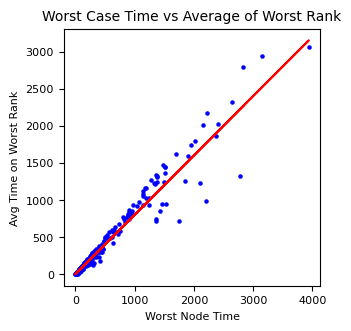

In [7]:
x = time_df["Worst Node Time"]
y = time_df["Average Worst Rank Time"]
y1=(y2/y)
fig,axes = plt.subplots(1,1,figsize=(3.25,3.2),layout="constrained")
plt.scatter(x, y, alpha=1, color='b',s=5.0,zorder=10)
#plt.plot(range(int(max(x))),0.9*np.asarray(range(int(max(x)))),zorder=10,color='r')


plt.plot(x,0.8*x,color='r',zorder=10)


axes.tick_params(axis='x', labelsize=8)
axes.tick_params(axis='y', labelsize=8)

axes.set_ylabel("Avg Time on Worst Rank",fontsize=8)
axes.set_xlabel("Worst Node Time",fontsize=8)
#axes.set_ylim([0,2000])
#axes.set_xlim([0,2000])

plt.title("Worst Case Time vs Average of Worst Rank",fontsize=10)
plt.show(fig)

fig.savefig("avg_slowest.pdf",format="pdf")


0      0.983107
1      0.994191
2      0.977352
3      0.955651
4      0.952552
         ...   
267    0.980872
268    0.927362
269    0.962046
270    0.942648
271    0.978128
Length: 272, dtype: float64


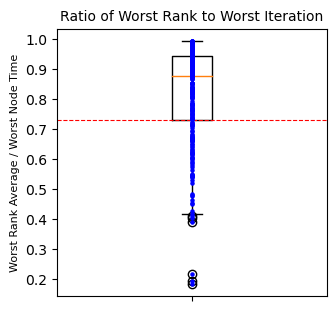

In [8]:
y1 = time_df["Average Worst Rank Time"]/time_df["Worst Node Time"]
fig,axes = plt.subplots(1,1,figsize=(3.25,3.0),layout="constrained")
print(y1)
axes.boxplot(y1,labels=[""])
plt.scatter([1]*len(y1), y1, alpha=1, color='b',s=5.0,zorder=10)
axes.tick_params(axis='x', labelsize=8)
#axes.hlines(np.percentile(y1,25),min(x),max(x),color='r',linestyle="--")
axes.set_ylabel("Worst Rank Average / Worst Node Time",fontsize=8)
plt.title("Ratio of Worst Rank to Worst Iteration",fontsize=10)
axes.hlines(np.percentile(y1,25),0.5,1.5,color='r',linestyle="--",linewidth=0.8)
plt.show(fig)
fig.savefig("box_plot_worst_case.pdf",format="pdf")

0.0 86.707261029389
1.0 5.842141544117744
2.0 1.9358915441176725
3.0 1.1488970588235405
4.0 0.9937959558823614
5.0 0.6807215073529439
6.0 0.4854090073529407
7.0 0.47966452205882304
8.0 1.7262178308823746


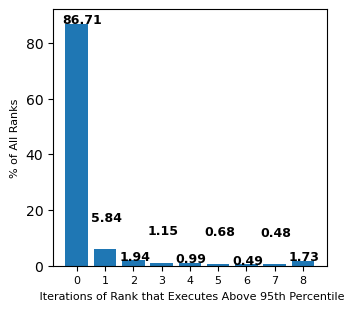

In [13]:
y1=[]
for i in range(1,129):
    y = list(time_df["Rank {} 95 Percentile Fraction".format(i)])
    y1+=y
y1=[_*8  for _ in y1]

y = {}

for _ in y1:
    if _ not in y: y[_]=1*100/len(y1)
    else: y[_]+=(1*100/len(y1))

for _ in sorted(y.items()):
    print("{} {}".format(_[0],_[1]))
fig,axes = plt.subplots(1,1,figsize=(3.25,3.0),layout="constrained")

#axes.hist(y1, weights=np.ones(len(y1)) / len(y1), bins = 9 )

axes.bar(y.keys(), y.values())


for i, v in zip(y.keys(),y.values()):
    add=0
    if i%2: add=10
    plt.text( i-0.5,v + 0.1+add, "{:.2f}".format(v),
            color = 'black', fontweight = 'bold',fontsize=9)


#plt.scatter([1+np.random.uniform(-0.2,0.2,1) for _ in range(len(y1))], y1, alpha=0.2, color='b',s=5.0,zorder=10)
axes.tick_params(axis='x', labelsize=8)
axes.set_ylabel("% of All Ranks",fontsize=8)
axes.set_xticks(range(9), ["{}".format(i) for i in range(9)])
axes.set_xlabel(" Iterations of Rank that Executes Above 95th Percentile",fontsize=8)
plt.title("",fontsize=10)
axes.set_ylim([0,92])
plt.show(fig)
fig.savefig("box_plot_speedup.pdf",format="pdf")

0      99.804688
1      99.707031
2      99.707031
3      99.511719
4      99.609375
         ...    
267    98.437500
268    83.984375
269    91.796875
270    88.769531
271    97.558594
Name: Percentile of Worst Rank Average, Length: 272, dtype: float64


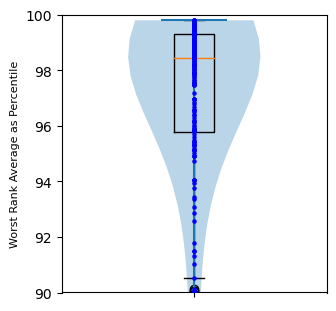

In [10]:
y1 = time_df["Percentile of Worst Rank Average"]
fig,axes = plt.subplots(1,1,figsize=(3.25,3.0),layout="constrained")
print(y1)
axes.boxplot(y1,labels=[""])
axes.violinplot(y1)
plt.scatter([1]*len(y1), y1, alpha=1, color='b',s=5.0,zorder=10)
axes.tick_params(axis='x', labelsize=8)
#axes.hlines(np.percentile(y1,25),min(x),max(x),color='r',linestyle="--")
axes.set_ylabel("Worst Rank Average as Percentile",fontsize=8)
axes.set_ylim([90,100])
plt.show(fig)
fig.savefig("box_plot_worst_case.pdf",format="pdf")